<a href="https://colab.research.google.com/github/tomorrownow/intro-to-geoprocessing-workshop/blob/main/geoprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Geoprocessing with the GRASS GIS Geoprocessing Engine

This notebook is an introduction to geoprocessing with [GRASS GIS](https://grass.osgeo.org). We aim to introduce you to the basics concepts of Geographic Information Systems (GIS) and how to use GRASS GIS to perform geoprocessing tasks.


## What is GIS?  
GIS is a system designed to capture, store, manipulate, analyze, manage, and present spatial or geographic data. GIS applications are tools that allow users to create interactive queries (user-created searches), analyze spatial information, edit data in maps, and present the results of all these operations.

## Configuring GRASS GIS

### Install GRASS GIS

In [5]:
%%bash

apt-get install grass grass-doc
# leave the directory with source code
cd ~

# download sample data
mkdir -p grassdata
curl -SL https://grass.osgeo.org/sampledata/north_carolina/nc_basic_spm_grass7.zip > nc_basic_spm_grass7.zip
unzip -qq nc_basic_spm_grass7.zip
mv nc_basic_spm_grass7 grassdata
rm nc_basic_spm_grass7.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 48.5M  100 48.5M    0     0  14.2M      0  0:00:03  0:00:03 --:--:-- 14.2M


In [9]:
import os
os.chdir(os.path.expanduser("~"))

### Create a GRASS Project

A project in GRASS is called a `Location`. Each location has subprojects called `Mapsets`. A mapset is a directory containing maps, which are the basic data layer in GRASS.

In [11]:
!grass -e -c ./grassdata/nc_basic_spm_grass7/tutorial

Creating new GRASS GIS mapset <tutorial>...


In [20]:
import os
import subprocess
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from pprint import pprint
from 
import json
import time

# Ask GRASS GIS where its Python packages are.
gisbase = subprocess.check_output(["grass", "--config", "path"], text=True).strip()
os.environ["GISBASE"] = gisbase
print(gisbase)

# Ask GRASS GIS where its Python packages are.
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True).strip()
)

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj


# Install Add-Ons
gs.run_command("g.extension", extension="d.region.grid")

# Start GRASS Session
## Set your grass data location
gj.init("./grassdata", "nc_basic_spm_grass7", "tutorial")

/usr/local/grass83
Your branch is up to date with 'origin/grass8'.


## Geospatial data?

Geospatial data is data that is associated with a particular location on the surface of the Earth. This data can be represented in many forms, such as points, lines, polygons, and rasters. Geospatial data can be used to answer questions such as "Where is the nearest hospital?" or "What is the average temperature in this region?".

### Vector Data

Vector data is represented as points, lines, and polygons on a map. Points are used to represent specific locations, such as the location of a tree or a building. Lines are used to represent linear features, such as roads or rivers. Polygons are used to represent areas, such as the boundaries of a city or a forest.

In [14]:
!g.list type=vector

boundary_region
boundary_state
census
elev_points
firestations
geology
geonames
hospitals
points_of_interest
railroads
roadsmajor
schools
streams
streets
zipcodes


### Rasters Data

Raster are a way of representing spatial data in a grid format. Each cell in the grid has a value that represents a particular attribute. For example, a raster could represent the temperature of the Earth's surface, with each cell representing the temperature at a particular location.

In [15]:
!g.list type=raster

basins
elevation
elevation_shade
geology
lakes
landuse
soils


### Coordinate Reference Systems (CRS)

Look up CRS at [epsg.io](https://epsg.io)


In [16]:
!g.proj -p

-PROJ_INFO-------------------------------------------------
name       : Lambert Conformal Conic
proj       : lcc
datum      : nad83
a          : 6378137.0
es         : 0.006694380022900787
lat_1      : 36.16666666666666
lat_2      : 34.33333333333334
lat_0      : 33.75
lon_0      : -79
x_0        : 609601.22
y_0        : 0
no_defs    : defined
-PROJ_SRID-------------------------------------------------
SRID       : EPSG:3358
-PROJ_UNITS------------------------------------------------
unit       : Meter
units      : Meters
meters     : 1


### Where can I get geospatial data?

#### North Carolina Online Data Portals

* [NC OneMap](https://www.nconemap.gov/)
* [Durham OpenData Portal](https://live-durhamnc.opendata.arcgis.com/)


## Spatial Temporal Scale

Spatial scale reprents the resolution (i.e., grain) of each pixel and the total extent (i.e., area) of the raster. The temporal scale represents the time period (i.e., extent) and the frequency (i.e., grain) of the data collection.

In [19]:
region = gs.read_command("g.region", raster="elevation", flags="p")

print(region)

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228500
south:      215000
west:       630000
east:       645000
nsres:      10
ewres:      10
rows:       1350
cols:       1500
cells:      2025000



## What is Geoprocessing?

### Create a new Project (Location and Mapset)

### Importing Data

In [1]:
hospitals = "https://webgis2.durhamnc.gov/server/rest/services/PublicServices/Community/MapServer/0/query?outFields=*&where=1%3D1"
zipcodes = "https://webgis2.durhamnc.gov/server/rest/services/PublicServices/Administrative/MapServer/0/query?outFields=*&where=1%3D1"

# Intro to Geoprocessing with the GRASS GIS Geoprocessing Engine

This notebook is an introduction to geoprocessing with [GRASS GIS](https://grass.osgeo.org). We aim to introduce you to the basics concepts of Geographic Information Systems (GIS) and how to use GRASS GIS to perform geoprocessing tasks.


## What is GIS?  
GIS is a system designed to capture, store, manipulate, analyze, manage, and present spatial or geographic data. GIS applications are tools that allow users to create interactive queries (user-created searches), analyze spatial information, edit data in maps, and present the results of all these operations.

### Setting the Region

We are going to set the region to the extent of the `elevatioin` raster data we are going to use. The `elevation` raster data is a Digital Elevation Model (DEM) of the area around Wake County, North Carolina.

In [8]:
region = gs.read_command("g.region", raster="elevation", flags="p")
print(region)

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228500
south:      215000
west:       630000
east:       645000
nsres:      10
ewres:      10
rows:       1350
cols:       1500
cells:      2025000



As shown above the `elevation` raster layer has a spatial resoution of 10m. This means that each cell has a dimension of 10m x 10m or $100m^2$. The `elevation` raster layer has a spatial extent of 1,350 rows x 1,500 columns which make up 202,500 cells representing an area of 20,$250,000m^2$ or $20.25km^2$.

### Geomorphometry

#### Digital Elevation Models (DEMs)

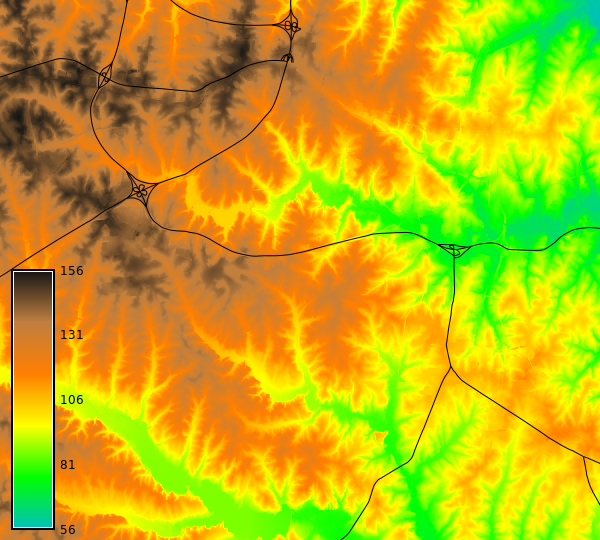

In [16]:
dem_map = gj.Map()

dem_map.d_rast(map="elevation")
dem_map.d_vect(map="roadsmajor", color="black")
dem_map.d_legdem_map.d_vect(map="roadsmajor", color="black")end(raster="elevation", at=(2,50,2,9))
# dem_map.d_region_grid(raster="elevation", color="black")
dem_map.show()

Let's now look at the unviariate statistics of the `elevation` raster layer.

In [23]:
univar = gs.read_command("r.univar", map="elevation")
print(univar)

total null and non-null cells: 2025000
total null cells: 0

Of the non-null cells:
----------------------
n: 2025000
minimum: 55.5788
maximum: 156.33
range: 100.751
mean: 110.375
mean of absolute values: 110.375
standard deviation: 20.3153
variance: 412.712
variation coefficient: 18.4057 %
sum: 223510266.558102



#### Slope and Aspect

In [18]:
gs.run_command(
    "r.slope.aspect",
    elevation="elevation",
    slope="slope",
    aspect="aspect",
    dx="dx",
    dy="dy",
    overwrite=True
)

##### Slope

Slope is the measure of the steepness or the degree of inclination of a surface. Slope is typically measured in degrees or percent. The slope of a surface can be calculated using the following formula:

$$

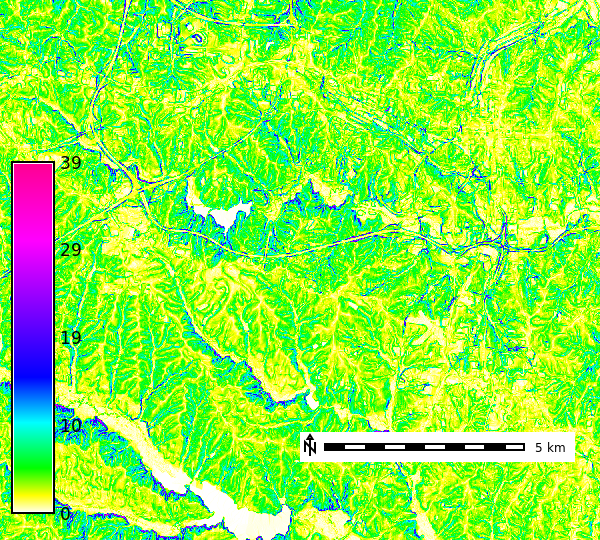

In [22]:
map = gj.Map()

map.d_rast(map="slope")
map.d_legend(raster="slope", at=(5,70,2,9))
map.d_barscale(at=(50,20,1,2), flags="n")
map.show()

##### Aspect

Aspect shows the direction (e.g., n, e, s, w)

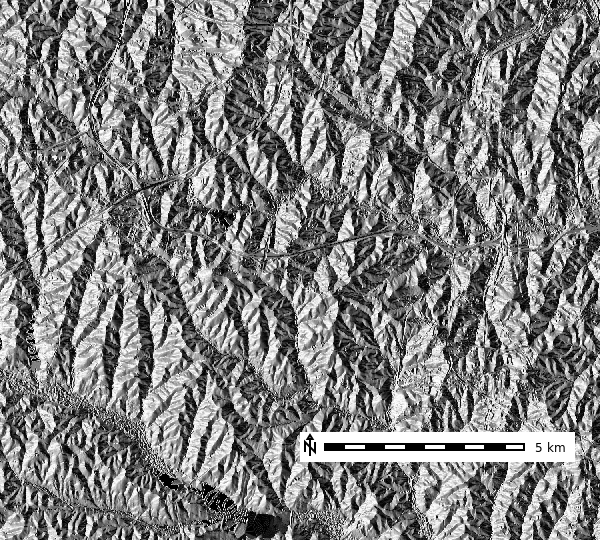

In [19]:
aspect_map = gj.Map()

aspect_map.d_rast(map="aspect")
# map.d_legend(raster="slope", at=(5,70,2,9))
aspect_map.d_barscale(at=(50,20,2,2), flags="n")
aspect_map.show()

#### Shaded Releif

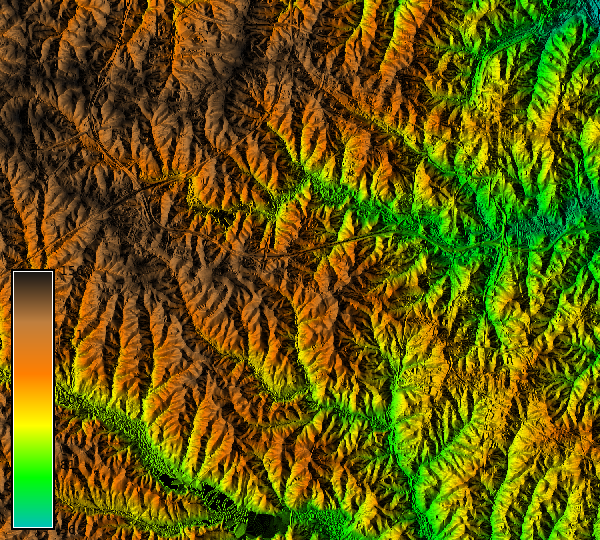

In [21]:
dem_map = gj.Map()

dem_map.d_shade(color="elevation", shade="aspect")
dem_map.d_legend(raster="elevation", at=(2,50,2,9))
dem_map.show()

#### Geomorphon

The tool geomorphon is used to classify the terrain into different landforms. The landforms are classified into 10 different classes. The geomorphon tool uses the following landform classes:

**Classifications**

1. Flat
2. Peak
3. Ridge
4. Shoulder
5. Spur
6. Slope
7. Hollow
8. Footslope
9. Valley
10. Pit

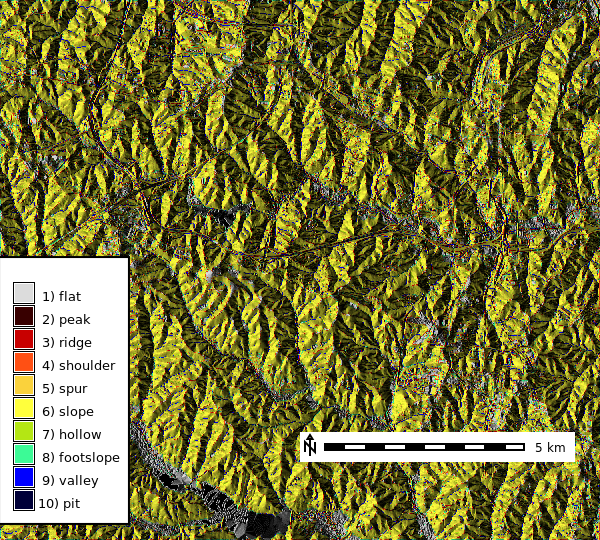

In [15]:
gs.run_command("r.geomorphon", elevation="elevation", forms="geoforms")

form_map = gj.Map()
form_map.d_shade(color="geoforms", shade="aspect")
form_map.d_legend(raster="geoforms", at=(2,50,2,9), flags="b")
form_map.d_barscale(at=(50,20,2,2), flags="n")
form_map.show()

In [ ]:
form_map = gj.Map()
form_map.d_shade(color="geoforms", shade="aspect")
form_map.d_legend(raster="geoforms", at=(2,50,2,9), flags="b")
form_map.d_barscale(at=(50,20,2,2), flags="n")
form_map.show()

#### Watershed Analysis

In [ ]:
!r.watershed -b elevation=elevation threshold=10000 accumulation=accum10k tci=tci10k drainage=direction10k basin=basins10k stream=streams10k memory=300

#### Heigh Above the Nearest Drainage (HAND)

#### SIMWE

In [ ]:
!r.sim.water -t elevation=elevation dx=dx dy=dy depth=depth discharge=disch error=sim_error walkers_output=walkers nwalkers=100000 niterations=30 random_seed=2 nprocs=24

#### Solar Radiation

In [ ]:
!r.sun elevation=elevation aspect=aspect slope=slope glob_rad=g172 insol_time=its172 day=172 nprocs=30

### Install Add-Ons

[Add-On Index](https://grass.osgeo.org/grass82/manuals/addons/index.html)



In [22]:
gs.run_command("g.extension", extension="r.boxplot")


Your branch is up to date with 'origin/grass8'.
